In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

In [2]:
DF=pd.read_csv('./data/daegu1.csv',encoding='euc-kr')

In [3]:
DF.columns=['날짜', '지점', '평균기온', '최저기온', '최고기온']
DF['날짜']=pd.to_datetime(DF['날짜'],format='%Y-%m-%d')
DF['날짜']

0       1907-01-31
1       1907-02-01
2       1907-02-02
3       1907-02-03
4       1907-02-04
           ...    
43100   2025-01-31
43101   2025-02-01
43102   2025-02-02
43103   2025-02-03
43104          NaT
Name: 날짜, Length: 43105, dtype: datetime64[ns]

In [4]:
for x in range(len(DF.columns)):
    print(f'컬럼명: {DF.columns[x]}\n결측치: {DF.iloc[:,x].isna().sum()}\n정상값: {DF.shape[0]-DF.iloc[:,x].isna().sum()}')
    print('-'*50)

컬럼명: 날짜
결측치: 1
정상값: 43104
--------------------------------------------------
컬럼명: 지점
결측치: 1
정상값: 43104
--------------------------------------------------
컬럼명: 평균기온
결측치: 703
정상값: 42402
--------------------------------------------------
컬럼명: 최저기온
결측치: 630
정상값: 42475
--------------------------------------------------
컬럼명: 최고기온
결측치: 632
정상값: 42473
--------------------------------------------------


In [5]:
DF.dropna(inplace=True)
DF.to_csv('./data/daegu-utf8-df.csv',index=False,mode='w',encoding='utf-8')

In [6]:
print('특정 연도와 달의 최고,최저 기온 평균값 계산')
year_DF=DF[DF['날짜'].dt.year==2024]
mon_DF=year_DF[year_DF['날짜'].dt.month==1]
mon_DF.index.name='순번'
mon_DF.head()

특정 연도와 달의 최고,최저 기온 평균값 계산


,날짜,지점,평균기온,최저기온,최고기온
순번,,,,,
42704,2024-01-01,143.0,3.9,-1.7,10.2
42705,2024-01-02,143.0,6.1,2.5,10.6
42706,2024-01-03,143.0,4.1,1.8,7.1
42707,2024-01-04,143.0,3.0,-1.9,9.2
42708,2024-01-05,143.0,4.6,-2.5,12.5


In [7]:
print(f'2024년 1월 최고기온 평균: {mon_DF['최고기온'].mean():.1f}, 최저기온 평균: {mon_DF['최저기온'].mean():.1f}')

2024년 1월 최고기온 평균: 7.6, 최저기온 평균: -2.1


{'whiskers': [<matplotlib.lines.Line2D at 0x25bc9e23ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x25bc9e23680>,
 'boxes': [<matplotlib.lines.Line2D at 0x25bc9e23f80>],
 'medians': [<matplotlib.lines.Line2D at 0x25bc9e23050>],
 'fliers': [<matplotlib.lines.Line2D at 0x25bc9e22d20>],
 'means': []}

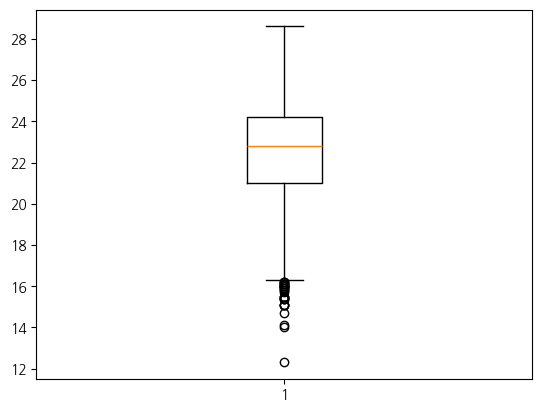

In [8]:
plt.boxplot(DF['최저기온'][DF['날짜'].dt.month==8])